In [863]:
import math
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [864]:
#Read train data from file
train_data = pd.read_csv("train.csv")

In [865]:
#Read train data from file
test_data = pd.read_csv("test.csv")

In [866]:
#Print size of our train matrix
print("Size of train data is {}".format(train_data.shape))

Size of train data is (891, 12)


In [867]:
#Print size of our test matrix
print("Size of test data is {}".format(test_data.shape))

Size of test data is (418, 11)


In [868]:
#You can see 5 first elements in our matrix
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [869]:
import matplotlib.pyplot as plt
%matplotlib inline

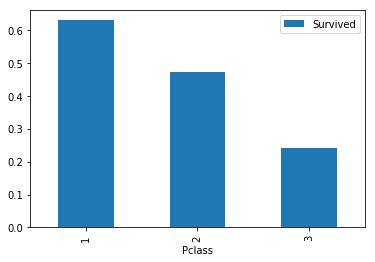

In [870]:
#Draw a histogramm to see survived people at Pclass (first,second,third)
sex_pivot = train_data.pivot_table(index = "Pclass", values = "Survived")
sex_pivot.plot.bar()
plt.show()

In [871]:
#Working with ages
def process_age(df,cut_points,label_names) : 
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels = label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

In [872]:
train_data = process_age(train_data,cut_points,label_names)
test_data = process_age(test_data,cut_points,label_names)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Missing
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Infant
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


train_data = cabin_features(train_data)
test_data = cabin_features(test_data)

In [873]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train_data = create_dummies(train_data,column)
    test_data = create_dummies(test_data,column)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,1,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,0


In [874]:
train_data.info()
train_data['Cabin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Cabin                         204 non-null object
Embarked                      889 non-null object
Age_categories                891 non-null category
Pclass_1                      891 non-null uint8
Pclass_2                      891 non-null uint8
Pclass_3                      891 non-null uint8
Sex_female                    891 non-null uint8
Sex_male                      891 non-null uint8
A

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
F2             3
E101           3
C22 C26        3
C126           2
F G73          2
D35            2
C125           2
E24            2
C123           2
B28            2
F4             2
D17            2
B5             2
E67            2
C65            2
B20            2
B49            2
B77            2
C78            2
C92            2
D26            2
B51 B53 B55    2
C83            2
B18            2
D36            2
              ..
B94            1
B80            1
C49            1
C62 C64        1
D37            1
D47            1
B82 B84        1
E49            1
D21            1
D28            1
A6             1
B78            1
E17            1
B102           1
C95            1
A14            1
C101           1
A34            1
D9             1
E36            1
C91            1
B69            1
C87            1
D19            1
E38            1
E10            1
A19            1
F G63         

In [875]:
#Working with cabins
import re
def cabin_features(data) :
    features = []
    for cabin in data :
        rooms = []
        numbers_rooms = []
        re.sub("\s\s+", " ",cabin)
        cabins = cabin.split(" ")
        n_cabins = len(cabins)
        if n_cabins > 1 :
            for i in range (n_cabins) :
                cabin_char = cabins[i][0]
                rooms.append(cabin_char)
        else :
            cabin_char = cabins[0][0]
        if cabin_char == "N" :
            n_cabins = 0
        if n_cabins > 1 :
                for i in range (n_cabins) :
                    cabin_num = cabins[i][1:]
                    if len(str(cabin_num)) == 0 :
                        cabin_num = 0
                        numbers_rooms.append(cabin_num)
                    else :
                        cabin_num = int(cabins[i][1:])
                        numbers_rooms.append(cabin_num)
        else :
            cabin_num = cabins[0][1:]
            if len(str(cabin_num)) == 0:
                cabin_num = 0
            else :
                cabin_num = int(cabins[0][1:])
        if n_cabins <= 1 :
            features.append([cabin_char , cabin_num , n_cabins])
        else :
            str1 = ','.join(list(set(rooms)))
            str2 = ', '.join(str(x) for x in numbers_rooms)
            features.append([cabin_char , str2 , n_cabins])
    return features

In [876]:
def select_column_from_matrix(matrix ,index_of_column) :
    result = []
    for i in range(len(matrix)) :
        result.append(matrix[i][index_of_column])
    return result

In [877]:
#Fill a table in train_data
train_cabins_only = train_data[["Cabin"]].copy()
train_cabins_only["Cabins_data"] = train_cabins_only["Cabin"].apply(lambda x : False if x != x  else True )
train_cabins_only["Cabin"] =  train_cabins_only["Cabin"].apply(lambda x : "N" if x != x else x)
train_cabins_only.head(5)

,Cabin,Cabins_data
0,N,False
1,C85,True
2,N,False
3,C123,True
4,N,False


In [895]:
#Fill a table in test data
test_cabins_only = test_data[["Cabin"]].copy()
test_cabins_only["Cabins_data"] = test_cabins_only["Cabin"].apply(lambda x : False if x != x  else True )
test_cabins_only["Cabin"] =  test_cabins_only["Cabin"].apply(lambda x : "N" if x != x else x)
test_cabins_only.head(5)

,Cabin,Cabins_data
0,N,False
1,N,False
2,N,False
3,N,False
4,N,False


In [896]:
features = cabin_features(train_cabins_only["Cabin"])
train_cabins_only["Cabin_char"] = select_column_from_matrix(features,0)
#train_cabins_only["Cabin_number"] = select_column_from_matrix(features,1)
#train_cabins_only["n_numbers"] = select_column_from_matrix(features,2)
#tain_cabins_only = train_cabins_only.drop(columns = ["Cabin"])
train_cabins_only.head(8)

,Cabin,Cabins_data,Cabin_char
0,N,False,N
1,C85,True,C
2,N,False,N
3,C123,True,C
4,N,False,N
5,N,False,N
6,E46,True,E
7,N,False,N


In [903]:
test_features = cabin_features(test_cabins_only["Cabin"])
test_cabins_only["Cabin_char"] = select_column_from_matrix(test_features,0)
test_cabins_only.head(14)

,Cabin,Cabins_data,Cabin_char
0,N,False,N
1,N,False,N
2,N,False,N
3,N,False,N
4,N,False,N
5,N,False,N
6,N,False,N
7,N,False,N
8,N,False,N
9,N,False,N


In [905]:
for column in ["Cabins_data"]:
    train_data_cabins = create_dummies(train_cabins_only,column)
    test_data_cabins = create_dummies(test_cabins_only,column)
for column in ["Cabin_char"]:
    train_data_cabins = create_dummies(train_data_cabins,column)
    test_data_cabins = create_dummies(test_data_cabins,column)
train_data_cabins = train_data_cabins.drop(columns = ["Cabin_char_T", "Cabins_data", "Cabin_char"])
test_data_cabins = test_data_cabins.drop(columns = [ "Cabins_data", "Cabin_char"])

In [906]:
columns2 = ['Cabins_data_False' , 'Cabins_data_True' ,
         'Cabin_char_A', 'Cabin_char_B', 'Cabin_char_C', 'Cabin_char_D',
          'Cabin_char_E' , 'Cabin_char_F' , 'Cabin_char_G' , 'Cabin_char_N']

In [907]:
for column in columns2 :
    train_data[column] = train_data_cabins[column]
    test_data[column] = test_data_cabins[column]

In [908]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabins_data_False,Cabins_data_True,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G,Cabin_char_N
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,1,0,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,0,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,1,0,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,0,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,1,0,0,0,0,0,0,0,0,1


In [909]:
from sklearn.linear_model import LogisticRegression

In [910]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Cabins_data_False' , 'Cabins_data_True' ,
         'Cabin_char_A', 'Cabin_char_B', 'Cabin_char_C', 'Cabin_char_D',
          'Cabin_char_E' , 'Cabin_char_F' , 'Cabin_char_G' , 'Cabin_char_N']

In [911]:
lr = LogisticRegression()
lr.fit(train_data[columns], train_data["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [912]:
from sklearn.model_selection import train_test_split

all_X = train_data[columns]
all_Y = train_data["Survived"]

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_Y, test_size=0.30,random_state=0)
all_X

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,...,Cabins_data_False,Cabins_data_True,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G,Cabin_char_N
0,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [913]:
#Logistic Regression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8134328358208955


In [25]:
#Random Forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8134328358208955


In [26]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)
predictions = gbt.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8171641791044776


In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)
predictions = gbt.predict(train_X)
accuracy = accuracy_score(train_y, predictions)

print("Accuracy = ",accuracy)

Accuracy =  0.8218298555377207


In [30]:
print("F measure = ",f1_score(test_y, predictions, average="macro"))
print("Precision = ",precision_score(test_y, predictions, average="macro"))
print("Recall = ",recall_score(test_y, predictions, average="macro")) 

F measure =  0.8016284233900814
Precision =  0.8070967741935484
Recall =  0.7975


In [914]:
holdout_predictions = lr.predict(test_data[columns])
holdout_ids = test_data["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [915]:
submission.to_csv("submission.csv",index=False)